LASS回归倾向于完全消除最不重要的特征的权重，因为Lasso回归会自动进行特征选择，同时输出一个稀疏模型

In [1]:
from sklearn import linear_model
reg=linear_model.Lasso(alpha=0.1)
reg.fit([[0,0],[1,1]],[0,1])

d:\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [3]:
reg.predict([[1,1]])

array([0.8])

In [4]:
#Lasso 和弹性网络的系数信号
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

np.random.seed(42)#随机数种子
n_samples,n_features=50,100
X=np.random.randn(n_samples,n_features)
idx=np.arange(n_features)
coef=(-1)**idx*np.exp(-idx/10)
coef[10:]=0 
y=np.dot(X,coef)
#添加噪声
y+=0.01*np.random.normal(size=n_samples)
#划分数据集
n_samples=X.shape[0]
X_train,y_train=X[:n_samples//2],y[:n_samples//2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]


In [7]:
##Lasso
from sklearn.linear_model import Lasso
alpha=0.1 
lasso=Lasso(alpha=alpha)
pred= lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso=r2_score(y_test,pred)
print(r2_score_lasso)
print(lasso)

0.6580638417732381
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [11]:
###弹性网络
from sklearn.linear_model import ElasticNet

enet=ElasticNet(alpha=alpha,l1_ratio=0.7)

y_pred_enet=enet.fit(X_train,y_train).predict(X_test)
r2_score_enet=r2_score(y_test,y_pred_enet)
print(enet)
print(r2_score_enet)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
0.6425152496145801


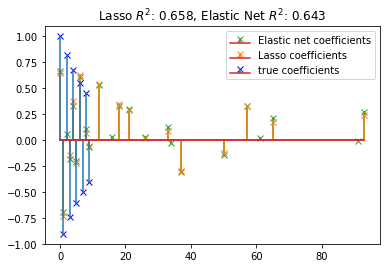

In [12]:
m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                   markerfmt='x', label='Elastic net coefficients')
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients')
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx')

plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f"
          % (r2_score_lasso, r2_score_enet))
plt.show()